In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/Users/gauravtyagi/Downloads/data/LANL-Earthquake-Prediction/train.csv',nrows=50000)


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['acoustic_data'], data['time_to_failure'],test_size=0.2)

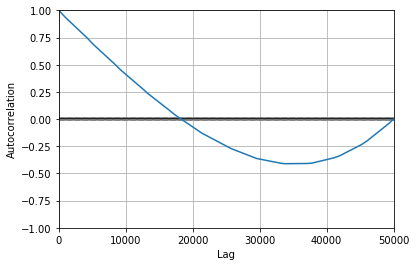

In [6]:
from pandas.plotting import autocorrelation_plot

series = pd.read_csv('/Users/gauravtyagi/Downloads/data/LANL-Earthquake-Prediction/train.csv', nrows=50000,header=0, index_col=0, squeeze=True)
autocorrelation_plot(series)
plt.show()

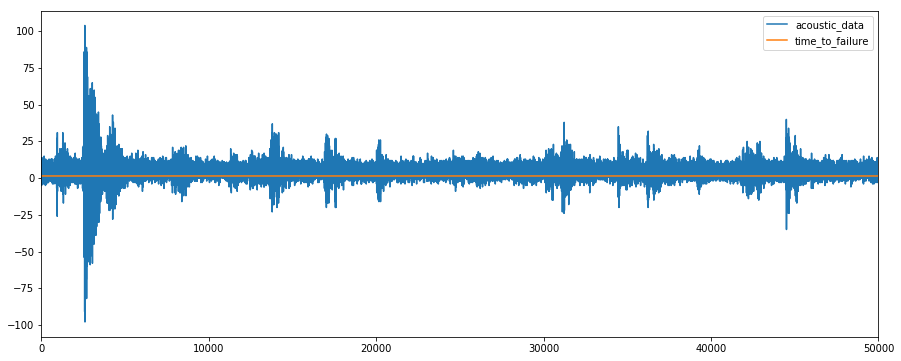

In [7]:
data.plot(figsize=(15, 6))
plt.show()

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
model = ARIMA(series, order=(5,1,0))

/Users/gauravtyagi/anaconda3/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/gauravtyagi/anaconda3/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [10]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.time_to_failure   No. Observations:                49999
Model:                 ARIMA(5, 1, 0)   Log Likelihood              480132.415
Method:                       css-mle   S.D. of innovations              0.000
Date:                Fri, 15 Feb 2019   AIC                        -960250.830
Time:                        20:01:06   BIC                        -960189.092
Sample:                             1   HQIC                       -960231.491
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.541e-07    7.3e-08     -3.480      0.001   -3.97e-07   -1.11e-07
ar.L1.D.time_to_failure    -0.0002      0.004     -0.054      0.957      -0.009       0.009


In [11]:
from pandas import DataFrame
import itertools
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
from pyramid.arima import auto_arima


/Users/gauravtyagi/anaconda3/lib/python2.7/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [23]:
stepwise_model = auto_arima(X_train, start_p=3, start_q=3,
                           max_p=9, max_q=9, m=19,
                           start_P=0, seasonal=False,
                           d=1, D=9, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=262682.586, BIC=262716.972, Fit time=17.207 seconds
Fit ARIMA: order=(0, 1, 0); AIC=290099.516, BIC=290116.709, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0); AIC=278755.805, BIC=278781.595, Fit time=0.114 seconds
Fit ARIMA: order=(0, 1, 1); AIC=262682.882, BIC=262708.672, Fit time=4.451 seconds
Fit ARIMA: order=(2, 1, 1); AIC=262684.970, BIC=262727.953, Fit time=20.865 seconds
Fit ARIMA: order=(1, 1, 2); AIC=262686.753, BIC=262729.736, Fit time=16.765 seconds
Fit ARIMA: order=(2, 1, 2); AIC=262689.011, BIC=262740.591, Fit time=21.799 seconds
Total fit time: 81.215 seconds
262682.585508


In [24]:
stepwise_model = auto_arima(X_train, start_p=3, start_q=3,
                           max_p=9, max_q=9, m=19,
                           start_P=0, seasonal=False,
                           d=1, D=9, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(3, 1, 3); AIC=262691.497, BIC=262760.270, Fit time=33.352 seconds
Fit ARIMA: order=(0, 1, 0); AIC=290099.516, BIC=290116.709, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0); AIC=278755.805, BIC=278781.595, Fit time=0.125 seconds
Fit ARIMA: order=(0, 1, 1); AIC=262682.882, BIC=262708.672, Fit time=4.661 seconds
Fit ARIMA: order=(1, 1, 1); AIC=262682.586, BIC=262716.972, Fit time=17.210 seconds
Fit ARIMA: order=(1, 1, 2); AIC=262686.753, BIC=262729.736, Fit time=16.924 seconds
Fit ARIMA: order=(2, 1, 2); AIC=262689.011, BIC=262740.591, Fit time=20.349 seconds
Fit ARIMA: order=(2, 1, 1); AIC=262684.970, BIC=262727.953, Fit time=21.108 seconds
Total fit time: 113.747 seconds
262682.585508


In [16]:
model=stepwise_model.fit(X_train)


In [17]:
result=model.predict(n_periods=X_test.max())

In [18]:
model.predict(7)

array([4.88593226, 4.90874172, 4.90891923, 4.90891783, 4.90891503,
       4.90891221, 4.90890939])

In [19]:
y_train[12714]

1.4658995146